In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [2]:
# Define image size and directories
IMAGE_SIZE = [224, 224]
train_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\val"

In [3]:
# Add preprocessing layer to the front of VGG19
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
# Get the number of classes
num_classes = len(os.listdir(train_directory))

In [6]:
# Build the model
x = Flatten()(vgg19.output)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [7]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2770 images belonging to 10 classes.
Found 1377 images belonging to 10 classes.


In [11]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=50,  # Adjust this value
    validation_steps=len(test_set) * 2
)

Epoch 1/10


C:\Users\castr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 408s 8s/step - accuracy: 0.2584 - loss: 2.8353 - val_accuracy: 0.6471 - val_loss: 1.1206
Epoch 2/10


C:\Users\castr\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 406s 8s/step - accuracy: 0.6248 - loss: 1.1660 - val_accuracy: 0.7204 - val_loss: 0.8625
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 479s 9s/step - accuracy: 0.7298 - loss: 0.8408 - val_accuracy: 0.7988 - val_loss: 0.6409
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 404s 8s/step - accuracy: 0.7672 - loss: 0.6881 - val_accuracy: 0.8155 - val_loss: 0.5959
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.8131 - loss: 0.6481 - val_accuracy: 0.7988 - val_loss: 0.6644
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 387s 8s/step - accuracy: 0.8037 - loss: 0.6221 - val_accuracy: 0.8678 - val_loss: 0.4206
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 454s 9s/step - accuracy: 0.8471 - loss: 0.4880 - val_accuracy: 0.8700 - val_loss: 0.4253
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 381s 8s/step - accuracy: 0.8807 - loss: 0.3994 - val_accuracy: 0.8787 - val_loss: 0.3718
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 453s 9s/step - accuracy: 0.8731 - loss: 0.4299 - val_accuracy: 0.8424 - val_loss: 0.

In [12]:
# Save the model
model.save('bird_species_vgg19.h5')

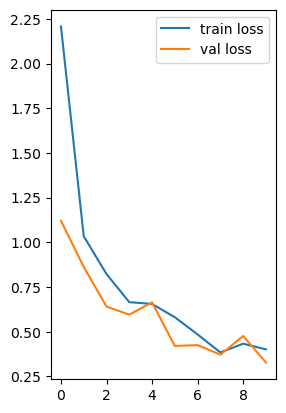

In [13]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

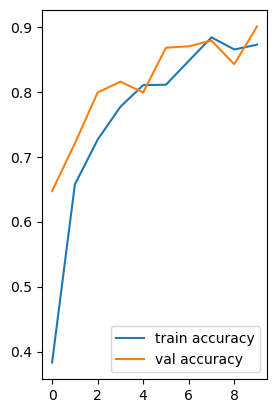

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()

In [15]:
# Load the saved model
saved_model_path = 'bird_species_vgg19.h5'
loaded_model = load_model(saved_model_path, compile=False)

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Define the labels
labels = {
    0: 'Crowned Pigeon',
    1: 'Green Imperial-Pigeon',
    2: 'Island Thrush',
    3: 'Philippine Coucal',
    4: 'Philippine Cuckoo-Dove',
    5: 'Philippine Eagle',
    6: 'Philippine Hawk-Eagle',
    7: 'Philippine Serpent Eagle',
    8: 'Philippine Turtle Dove',
    9: 'Philippine Wood Pigeon',
}

In [22]:
# Define the output function
def output(location, model, label_mapping):
    img = load_img(location, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction, axis=-1)
    predicted_probability = prediction[0, predicted_class[0]]
    
    if predicted_class[0] in label_mapping:
        class_label = label_mapping[predicted_class[0]]
        return class_label, predicted_probability
    else:
        return "Unknown Class (Index: {})".format(predicted_class[0]), predicted_probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Bird Species Prediction: Philippine Coucal
Predicted Probability: 0.95854294


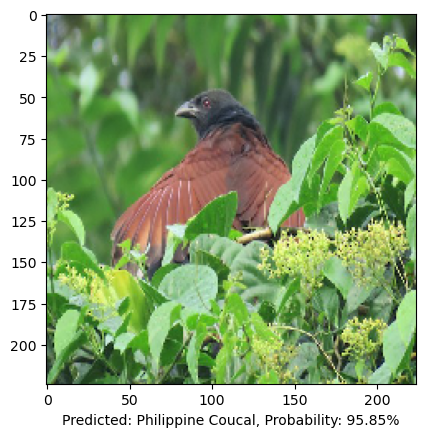

In [24]:
# Test the model on a new image
img_path = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\train\Philippine Coucal\480 (46).jpg"
pic = load_img(img_path, target_size=(224, 224))
plt.imshow(pic)
result, predicted_probability = output(img_path, loaded_model, labels)
print("Bird Species Prediction:", result)
print("Predicted Probability:", predicted_probability)

# Add label to the plot
plt.xlabel(f"Predicted: {result}, Probability: {predicted_probability:.2%}")
plt.show()